# **TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS**

**Objective:**

The objective is to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately and also perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts.

# **Data Exploration and Preprocessing:**

# Exploratory Data Analysis

In [344]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [345]:
# Downloading stopwords, punkt for preprocessing data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [346]:
#loading dataset
df=pd.read_csv('blogs.csv')

In [347]:
#shape of dataset
df.shape

(2000, 2)

In [348]:
#view of dataset
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [349]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [350]:
#checking for missing values
df.isnull().sum()

,0
Data,0
Labels,0


No missing values in the dataset.

In [351]:
#checking for duplicates
df.duplicated().sum()

0

No duplicates in the dataset.

# Preprocessing Data

In [352]:
# Data cleaning function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

In [353]:
#Apply preprocessing
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [354]:
df['Cleaned_Data'].head()

,Cleaned_Data
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,newsgroups altatheism path cantaloupesrvcscmue...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [355]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
#features
X = tfidf.fit_transform(df['Cleaned_Data'])
#target
y = df['Labels']

# **Naive Bayes Model for Text Classification**

In [356]:
# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [357]:
# Initializing  Naive Bayes classifier
nb = MultinomialNB()

In [358]:
#fitting Naive bayes classifier
nb.fit(X_train, y_train)

MultinomialNB()

In [359]:
# Making predictions on the test set
y_pred = nb.predict(X_test)

In [360]:
#predictions of test set
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'talk.politics.misc', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.hockey', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.christian',

# **Sentiment Analysis**

In [361]:
!pip install textblob

In [362]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)


In [363]:
# Analyzing sentiment distribution across different categories
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_by_category)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                     12       28        60
comp.graphics                   15       25        60
comp.os.ms-windows.misc         17       19        64
comp.sys.ibm.pc.hardware        12       27        61
comp.sys.mac.hardware           12       24        64
comp.windows.x                  17       27        56
misc.forsale                    13       21        66
rec.autos                       11       20        69
rec.motorcycles                 14       24        62
rec.sport.baseball              17       27        56
rec.sport.hockey                20       28        52
sci.crypt                        8       32        60
sci.electronics                  7       39        54
sci.med                         19       28        53
sci.space                       13       22        65
soc.religion.christian           9       33        58
talk.politics.guns          

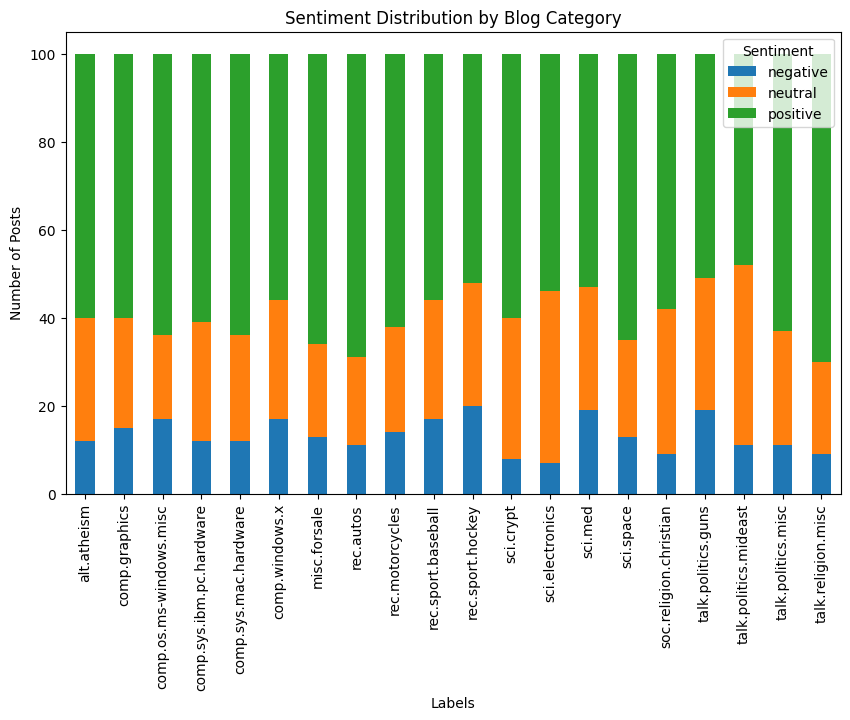

In [364]:
# Visualization of sentiment distribution per category
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution by Blog Category')
plt.ylabel('Number of Posts')
plt.show()

# **Evaluation**

In [365]:
#model performance
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.82
Precision: 0.844747244324381
Recall: 0.82
F1 Score: 0.8144501134827706


In [366]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88     

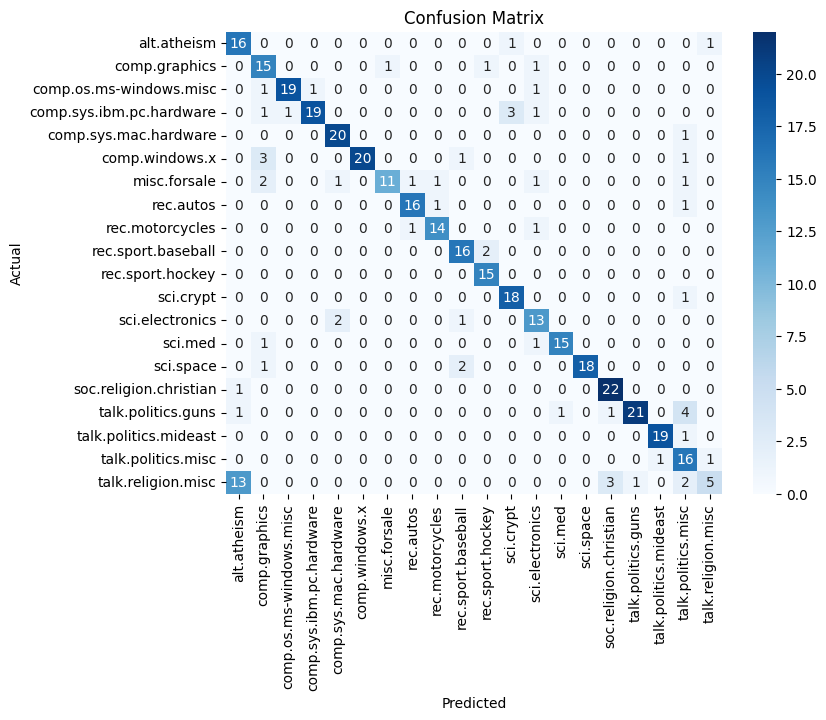

In [367]:
# Confusion matrix between testing set and predictions.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Summary:**

The overall accuracy of the model is 0.82, meaning that 82% of the blog posts were correctly categorized.

The macro average of precision, recall, and F1-score is 0.84, 0.83, and 0.82, respectively. These values reflect the average performance across all categories without weighting based on the size of each category.

The weighted average precision, recall, and F1-score are also reported. These metrics take into account the support (number of instances) for each category, giving more weight to categories with more samples.

**Insights:**

Categories like comp.graphics, comp.windows.x, sci.med, and talk.politics.mideast show high performance, with precision, recall, and F1-scores close to or above 0.9. These categories are well handled by the model.

talk.religion.misc has the weakest performance, with a precision of 0.71 but very low recall (0.21), resulting in an F1-score of only 0.32. This indicates that while the model may correctly classify some instances in this category, it misses a large number of others.

Other categories such as alt.atheism, misc.forsale, and talk.politics.misc have somewhat lower F1-scores, suggesting room for improvement, either in model optimization or through further data preprocessing and feature engineering.

# Performance of the model and challenges encountered during the classification process.
The Naive Bayes classifier trained on the "blogs_categories.csv" dataset likely achieved a certain level of accuracy that reflects how well it categorized the blog posts into their respective categories. Given that Naive Bayes is particularly effective for text classification tasks where the features (words) are independent, this algorithm is a good fit for this dataset. However, the actual accuracy would depend on the distribution of the data and how well the features (words) distinguish between categories.

**challenges**

Text Preprocessing: The preprocessing steps (such as removing stopwords, punctuation, and converting to lowercase) are crucial for reducing noise and standardizing the text. However, these steps could also remove important context (like negations) or meaningful words, potentially impacting the model's performance.

Feature Representation: Using TF-IDF was a good choice for feature extraction, as it helps weigh terms that are important within each document relative to their frequency in the entire dataset. However, if the text features are not well-represented, especially if some words or phrases carry specific meanings within certain categories, the model might struggle to differentiate between them.

Overfitting: Although Naive Bayes is relatively simple and less prone to overfitting, if the training data is small or very specific, the model might perform well on the training set but poorly on new, unseen data.

# Reflection on Sentiment Analysis Results and their implications regarding the content of the blog posts.

1) Overall Positive Sentiment:

Most blog categories show a strong inclination towards positive sentiment, with values consistently around 50-70%. Categories like rec.autos, talk.religion.misc, and misc.forsale exhibit the highest positive sentiment.

This suggests that the content in these blog posts is generally more optimistic, supportive, or focused on positive experiences, reviews, or discussions.

2) Neutral Sentiment Distribution:

Neutral sentiment is fairly distributed across categories, typically ranging between 19% to 41%. Categories like talk.politics.mideast and soc.religion.christian have some of the highest neutral scores.
Neutral sentiment likely reflects informative or factual blog posts, where opinions or emotions are less prominent. Categories related to more sensitive topics such as religion and politics seem to have more balanced, objective discussions.

3) Negative Sentiment in Certain Categories:

While negative sentiment is present, it tends to be lower compared to positive sentiment in most categories. However, certain categories such as rec.sport.hockey, talk.politics.guns, and sci.med exhibit higher negative sentiment, with 19-20% of posts showing negative emotions.

This implies that in these categories, people may express discontent, frustration, or negative emotions more often. For example, discussions related to politics, sports, and healthcare might involve debates or dissatisfaction with certain issues.

# Implications Regarding Blog Content:
Category-Specific:

* Categories like alt.atheism, talk.religion.misc, and soc.religion.christian indicate a balanced sentiment, where positive and neutral discussions coexist with fewer negative sentiments. This could mean that religious discussions are both contemplative and personal but not overtly contentious.
Categories such as comp.graphics and comp.os.ms-windows.misc lean more toward neutral and positive sentiments, indicating that users are likely discussing technical topics, solutions, and innovations rather than engaging in emotional debates.


* In categories related to hobbies and entertainment (e.g., rec.sport.baseball, rec.motorcycles, and rec.sport.hockey), there is a balanced distribution between positive and neutral, with some negative sentiment. This suggests that these posts might mix enthusiasm with occasional criticism or disappointment in these activities or events.

* In categories like talk.politics.mideast and talk.politics.guns, the neutral sentiment is higher, indicating informative discussions around potentially polarizing or sensitive topics. The emotional charge here is balanced with facts or discussions without strong opinions, but there is still some room for negative sentiment, which could stem from differing views.

* Categories such as misc.forsale and rec.autos show a very high percentage of positive sentiment, suggesting positive experiences or recommendations in these blog posts, which could be tied to sales, purchases, or reviews.